In [2]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

In [3]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Enformer_feature_0504.csv')
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_CTCF,K562_H3K27ac,HepG2_H3K27ac,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.709,0.082,0.682,1.078,3.238,1.168,0.860,1.123,0.272,0.605,0.681,0.715,1.879,0.781,1.102,0.131,0.637,0.744,0.913,1.453,1.293,0.935,0.894,0.087,0.704,1.485,0.729,1.389,1.605,1.075,0.998,0.144,0.304,1.092,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.266,0.085,0.668,1.079,3.574,1.123,0.851,1.135,0.279,0.596,0.614,0.766,1.965,0.771,1.085,0.151,0.680,0.955,0.935,1.733,1.328,0.923,0.925,0.095,0.706,1.537,0.769,1.433,1.644,1.053,1.033,0.156,0.309,1.098,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.619,0.048,0.638,1.514,0.319,0.892,1.641,0.938,0.060,0.592,1.427,0.518,0.690,2.527,1.100,0.039,0.875,1.815,1.131,1.625,1.552,1.791,1.100,0.110,0.880,1.006,1.352,1.502,1.488,1.745,1.126,0.066,0.274,1.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.668,0.056,0.654,1.568,0.356,0.936,1.596,1.023,0.065,0.606,1.577,0.638,0.756,1.587,1.188,0.048,0.939,3.291,1.087,1.905,1.715,1.789,1.207,0.139,0.939,1.271,1.322,1.982,1.704,1.768,1.203,0.083,0.281,1.071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.168,0.018,0.579,0.514,0.312,0.604,1.341,0.756,0.051,0.644,0.798,0.374,0.635,2.041,1.088,0.063,0.816,0.452,1.946,1.014,1.305,1.562,0.916,0.043,0.814,0.744,1.322,0.963,1.608,2.523,1.021,0.035,0.288,0.728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.708,1.294,1.077,NaN,NaN,0.103,1.596,6.055,6.330,0.894,1.387,1.809,0.171,0.790,3.852,0.531,0.843,1.012,1.396,0.268,1.266,3.910,2.299,3.264,1.272,1.167,1.566,0.054,0.738,1.843,3.035,1.803,1.162,1.203,1.338,0.093,0.338,1.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.547,-0.429,NaN,NaN,0.042,0.653,1.294,0.503,1.101,1.281,1.050,0.096,0.670,1.047,0.656,1.008,1.539,1.345,0.105,1.089,0.837,1.748,2.110,1.506,1.652,1.192,0.086,0.804,1.090,1.726,1.518,1.455,1.311,1.213,0.060,0.338,1.190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.146,-0.200,-0.310,NaN,NaN,0.035,0.656,1.553,0.359,0.783,1.179,0.953,0.106,0.707,1.820,1.705,0.801,1.350,1.248,0.080,1.133,2.773,1.363,2.562,1.756,1.584,1.236,0.133,1.026,0.966,3.973,1.602,1.668,3.094,1.170,0.113,0.520,0.949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
760677,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,-0.119,-0.090,-0.387,NaN,NaN,0.058,0.594,1.013,0.418,1.225,1.225,0.974,0.119,0.751,1.762,0.816,1.109,1.715,1.324,0.070,0.942,1.002,1.436,1.457,1.619

In [4]:
MPRA_df['ref_ID'] = MPRA_df['ID'].str.split(':').str[:4].str.join(':')
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_CTCF,K562_H3K27ac,HepG2_H3K27ac,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,ref_ID
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.709,0.082,0.682,1.078,3.238,1.168,0.860,1.123,0.272,0.605,0.681,0.715,1.879,0.781,1.102,0.131,0.637,0.744,0.913,1.453,1.293,0.935,0.894,0.087,0.704,1.485,0.729,1.389,1.605,1.075,0.998,0.144,0.304,1.092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:14677:G:A
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.266,0.085,0.668,1.079,3.574,1.123,0.851,1.135,0.279,0.596,0.614,0.766,1.965,0.771,1.085,0.151,0.680,0.955,0.935,1.733,1.328,0.923,0.925,0.095,0.706,1.537,0.769,1.433,1.644,1.053,1.033,0.156,0.309,1.098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:14677:G:A
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.619,0.048,0.638,1.514,0.319,0.892,1.641,0.938,0.060,0.592,1.427,0.518,0.690,2.527,1.100,0.039,0.875,1.815,1.131,1.625,1.552,1.791,1.100,0.110,0.880,1.006,1.352,1.502,1.488,1.745,1.126,0.066,0.274,1.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:63697:T:C
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.668,0.056,0.654,1.568,0.356,0.936,1.596,1.023,0.065,0.606,1.577,0.638,0.756,1.587,1.188,0.048,0.939,3.291,1.087,1.905,1.715,1.789,1.207,0.139,0.939,1.271,1.322,1.982,1.704,1.768,1.203,0.083,0.281,1.071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:63697:T:C
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.168,0.018,0.579,0.514,0.312,0.604,1.341,0.756,0.051,0.644,0.798,0.374,0.635,2.041,1.088,0.063,0.816,0.452,1.946,1.014,1.305,1.562,0.916,0.043,0.814,0.744,1.322,0.963,1.608,2.523,1.021,0.035,0.288,0.728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:64764:C:T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.708,1.294,1.077,NaN,NaN,0.103,1.596,6.055,6.330,0.894,1.387,1.809,0.171,0.790,3.852,0.531,0.843,1.012,1.396,0.268,1.266,3.910,2.299,3.264,1.272,1.167,1.566,0.054,0.738,1.843,3.035,1.803,1.162,1.203,1.338,0.093,0.338,1.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y:15815629:NA:NA
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.547,-0.429,NaN,NaN,0.042,0.653,1.294,0.503,1.101,1.281,1.050,0.096,0.670,1.047,0.656,1.008,1.539,1.345,0.105,1.089,0.837,1.748,2.110,1.506,1.652,1.192,0.086,0.804,1.090,1.726,1.518,1.455,1.311,1.213,0.060,0.338,1.190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y:21740684:NA:NA
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.146,-0.200,-0.310,NaN,NaN,0.035,0.656,1.553,0.359,0.783,1.179,0.953,0.106,0.707,1.820,1.705,0.801,1.350,1.248,0.080,1.133,2.773,1.363,2.562,1.756,1.584,1.236,0.133,1.026,0.966,3.973,1.602,1.668,3.094,1.170,0.113,0.520,0.949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y:21740884:NA:NA
760677,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,-0.119,-0.090,-0.387,NaN,N

In [13]:
# 统计每组 ref 和 alt 的数量
allele_counts = MPRA_df.groupby('ref_ID')['allele'].value_counts().unstack(fill_value=0)

# 找出 ref 和 alt 恰好各 1 个的 ref_ID
valid_ref_ids = allele_counts[(allele_counts.get('ref', 0) == 1) & (allele_counts.get('alt', 0) == 1)].index

# 只保留这些 ref_ID 对应的行
filtered_df = MPRA_df[MPRA_df['ref_ID'].isin(valid_ref_ids)]

filtered_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_CTCF,K562_H3K27ac,HepG2_H3K27ac,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,ref_ID
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.709,0.082,0.682,1.078,3.238,1.168,0.860,1.123,0.272,0.605,0.681,0.715,1.879,0.781,1.102,0.131,0.637,0.744,0.913,1.453,1.293,0.935,0.894,0.087,0.704,1.485,0.729,1.389,1.605,1.075,0.998,0.144,0.304,1.092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:14677:G:A
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.266,0.085,0.668,1.079,3.574,1.123,0.851,1.135,0.279,0.596,0.614,0.766,1.965,0.771,1.085,0.151,0.680,0.955,0.935,1.733,1.328,0.923,0.925,0.095,0.706,1.537,0.769,1.433,1.644,1.053,1.033,0.156,0.309,1.098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:14677:G:A
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.619,0.048,0.638,1.514,0.319,0.892,1.641,0.938,0.060,0.592,1.427,0.518,0.690,2.527,1.100,0.039,0.875,1.815,1.131,1.625,1.552,1.791,1.100,0.110,0.880,1.006,1.352,1.502,1.488,1.745,1.126,0.066,0.274,1.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:63697:T:C
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.668,0.056,0.654,1.568,0.356,0.936,1.596,1.023,0.065,0.606,1.577,0.638,0.756,1.587,1.188,0.048,0.939,3.291,1.087,1.905,1.715,1.789,1.207,0.139,0.939,1.271,1.322,1.982,1.704,1.768,1.203,0.083,0.281,1.071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:63697:T:C
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.168,0.018,0.579,0.514,0.312,0.604,1.341,0.756,0.051,0.644,0.798,0.374,0.635,2.041,1.088,0.063,0.816,0.452,1.946,1.014,1.305,1.562,0.916,0.043,0.814,0.744,1.322,0.963,1.608,2.523,1.021,0.035,0.288,0.728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:64764:C:T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760655,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,X:155233098:T:C:R:wC,chrX,155233098,T,C,ref,OL41_42,GTEx,-0.167,-0.886,-1.035,NaN,-0.828,0.112,0.698,1.318,0.916,1.484,0.753,1.051,0.095,0.451,1.198,0.877,1.498,0.502,0.842,0.058,0.579,0.523,1.261,1.287,1.426,0.717,0.747,0.058,0.644,1.211,1.038,1.035,1.852,0.771,0.888,0.057,0.226,0.812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X:155233098:T:C
760656,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,X:155233794:A:G:R:wC,chrX,155233794,A,G,ref,OL41_42,GTEx,0.016,0.883,2.041,NaN,1.060,0.051,0.726,2.336,1.213,1.115,0.970,1.057,0.123,0.656,1.297,1.185,1.545,0.842,1.226,0.116,2.402,15.414,1.091,6.824,1.436,0.972,1.553,0.251,1.416,3.121,1.752,7.066,2.443,0.880,1.305,0.175,1.065,1.299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X:155233794:A:G
760657,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,X:155233794:A:G:A:wC,chrX,155233794,A,G,alt,OL41_42,GTEx,-0.512,0.397,1.306,NaN,0.365,0.054,0.751,2.535,1.268,1.228,1.014,1.086,0.153,0.649,1.346,1.230,1.896,0.856,1.195,0.106,1.791,7.816,1.158,5.780,1.541,0.957,1.406,0.144,1.216,2.598,1.898,4.960,2.078,0.887,1.255,0.170,0.945,1.254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X:155233794:A:G
760658,TGGTGAGTTGCTTCTGTGCACACACTTTTGTTTATGAGTGTGCATG...,X:155234730:T:C:A:wC,chrX,155234730,T,C,alt,OL41_42,GTEx,-0.443,

In [15]:
MPRA_df_paired = filtered_df.sort_values(['chr', 'pos', 'allele']).reset_index(drop=True)
MPRA_df_paired

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_CTCF,K562_H3K27ac,HepG2_H3K27ac,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,ref_ID
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.709,0.082,0.682,1.078,3.238,1.168,0.860,1.123,0.272,0.605,0.681,0.715,1.879,0.781,1.102,0.131,0.637,0.744,0.913,1.453,1.293,0.935,0.894,0.087,0.704,1.485,0.729,1.389,1.605,1.075,0.998,0.144,0.304,1.092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:14677:G:A
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.266,0.085,0.668,1.079,3.574,1.123,0.851,1.135,0.279,0.596,0.614,0.766,1.965,0.771,1.085,0.151,0.680,0.955,0.935,1.733,1.328,0.923,0.925,0.095,0.706,1.537,0.769,1.433,1.644,1.053,1.033,0.156,0.309,1.098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:14677:G:A
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.619,0.048,0.638,1.514,0.319,0.892,1.641,0.938,0.060,0.592,1.427,0.518,0.690,2.527,1.100,0.039,0.875,1.815,1.131,1.625,1.552,1.791,1.100,0.110,0.880,1.006,1.352,1.502,1.488,1.745,1.126,0.066,0.274,1.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:63697:T:C
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.668,0.056,0.654,1.568,0.356,0.936,1.596,1.023,0.065,0.606,1.577,0.638,0.756,1.587,1.188,0.048,0.939,3.291,1.087,1.905,1.715,1.789,1.207,0.139,0.939,1.271,1.322,1.982,1.704,1.768,1.203,0.083,0.281,1.071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:63697:T:C
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:A:wC,chr1,64764,C,T,alt,OL41_42,GTEx,0.077,-0.437,-0.850,NaN,-0.414,0.018,0.568,0.520,0.326,0.607,1.252,0.748,0.049,0.617,0.644,0.374,0.641,1.804,1.017,0.065,0.805,0.445,1.951,1.000,1.336,1.526,0.901,0.060,0.761,0.843,1.324,0.964,1.633,1.782,1.078,0.037,0.278,0.735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:64764:C:T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636731,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,X:155233098:T:C:R:wC,chrX,155233098,T,C,ref,OL41_42,GTEx,-0.167,-0.886,-1.035,NaN,-0.828,0.112,0.698,1.318,0.916,1.484,0.753,1.051,0.095,0.451,1.198,0.877,1.498,0.502,0.842,0.058,0.579,0.523,1.261,1.287,1.426,0.717,0.747,0.058,0.644,1.211,1.038,1.035,1.852,0.771,0.888,0.057,0.226,0.812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X:155233098:T:C
636732,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,X:155233794:A:G:A:wC,chrX,155233794,A,G,alt,OL41_42,GTEx,-0.512,0.397,1.306,NaN,0.365,0.054,0.751,2.535,1.268,1.228,1.014,1.086,0.153,0.649,1.346,1.230,1.896,0.856,1.195,0.106,1.791,7.816,1.158,5.780,1.541,0.957,1.406,0.144,1.216,2.598,1.898,4.960,2.078,0.887,1.255,0.170,0.945,1.254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X:155233794:A:G
636733,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,X:155233794:A:G:R:wC,chrX,155233794,A,G,ref,OL41_42,GTEx,0.016,0.883,2.041,NaN,1.060,0.051,0.726,2.336,1.213,1.115,0.970,1.057,0.123,0.656,1.297,1.185,1.545,0.842,1.226,0.116,2.402,15.414,1.091,6.824,1.436,0.972,1.553,0.251,1.416,3.121,1.752,7.066,2.443,0.880,1.305,0.175,1.065,1.299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X:155233794:A:G
636734,TGGTGAGTTGCTTCTGTGCACACACTTTTGTTTATGAGTGTGCATG...,X:155234730:T:C:A:wC,chrX,155234730,T,C,alt,OL41_42,GTEx,-0.443,

In [27]:
MPRA_ref = MPRA_df_paired[MPRA_df_paired['allele'] == 'ref'].reset_index(drop=True)
MPRA_alt = MPRA_df_paired[MPRA_df_paired['allele'] == 'alt'].reset_index(drop=True)

print(MPRA_ref.shape, MPRA_alt.shape)

(318368, 55) (318368, 55)


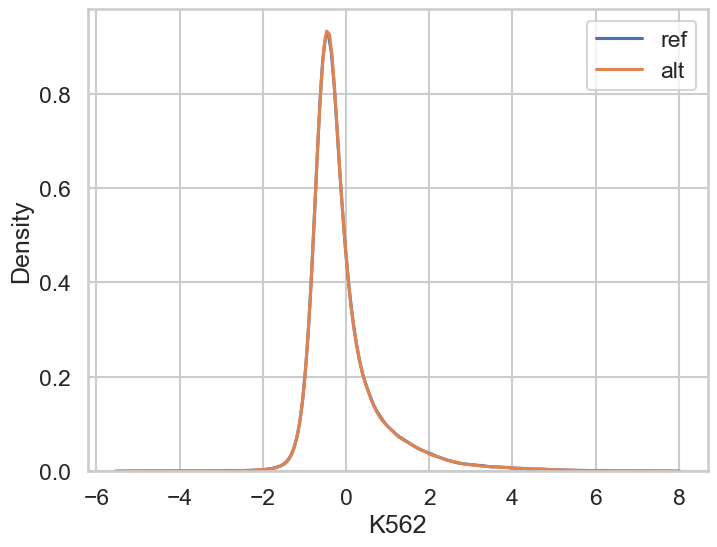

In [28]:
group1 = MPRA_ref['K562']
group2 = MPRA_alt['K562']

sns.kdeplot(group1, label='ref')
sns.kdeplot(group2, label='alt')
plt.legend()

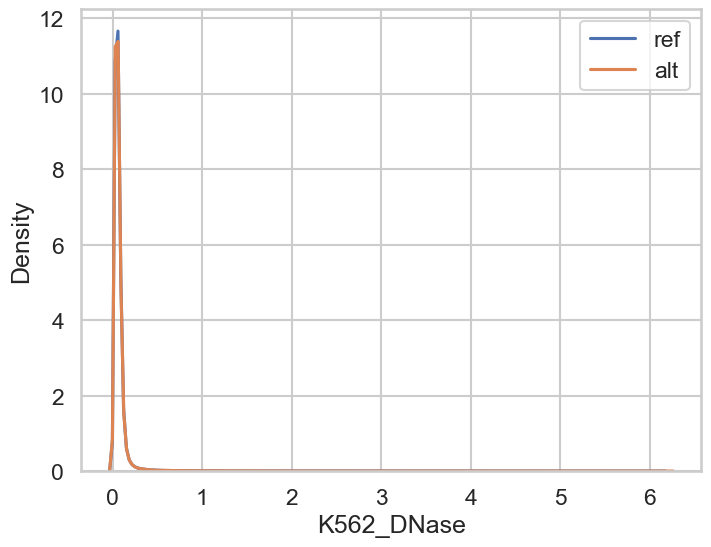

In [29]:
group1 = MPRA_ref['K562_DNase']
group2 = MPRA_alt['K562_DNase']

sns.kdeplot(group1, label='ref')
sns.kdeplot(group2, label='alt')
plt.legend()

0.13403890973659285


<Axes: xlabel='K562_DNase', ylabel='K562'>

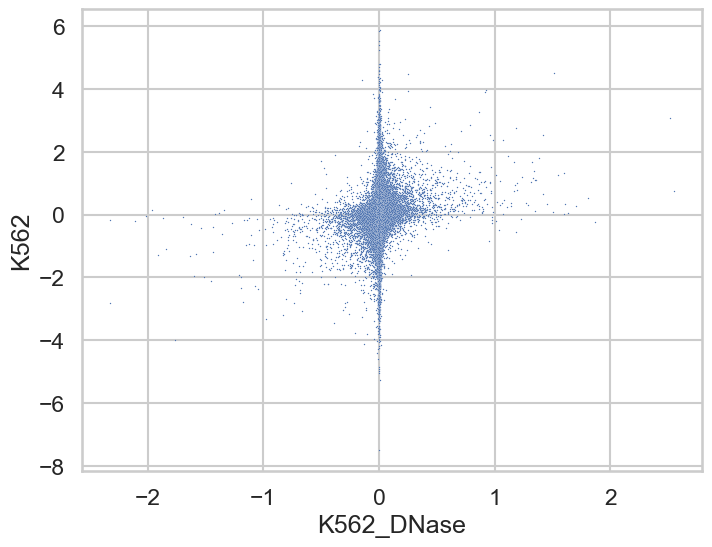

In [30]:
x = MPRA_ref[f'K562_DNase'] - MPRA_alt[f'K562_DNase']
y = MPRA_ref[f'K562'] - MPRA_alt[f'K562']
r = pearson(x, y)[0]
print(r)
sns.scatterplot(x=x, y=y, s=1)

In [7]:
cell_types = ['K562', 'HepG2', 'SK-N-SH']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

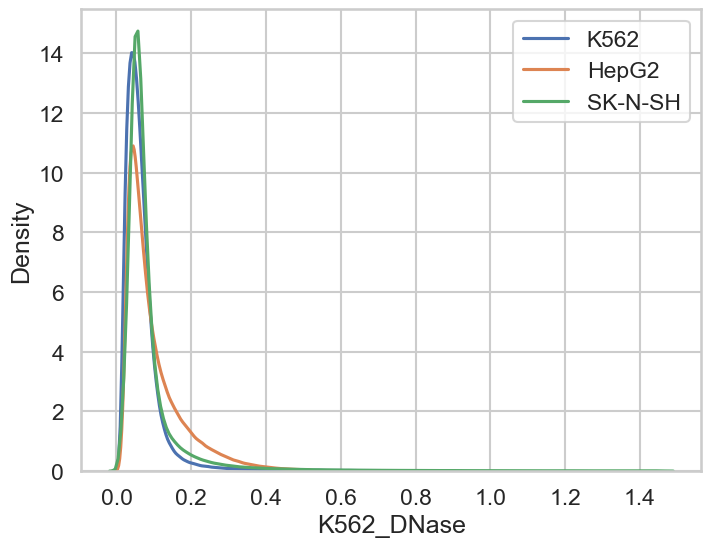

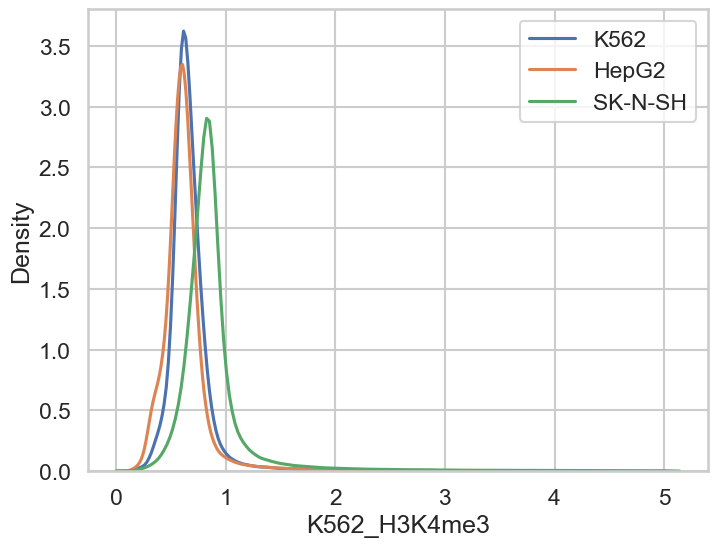

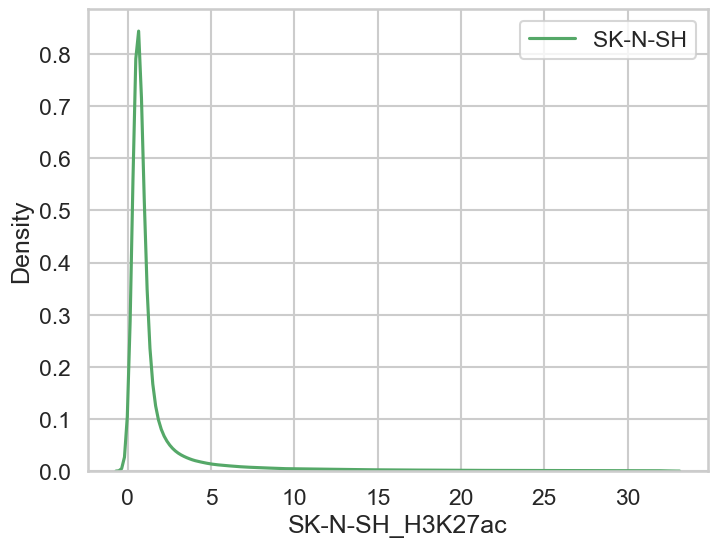

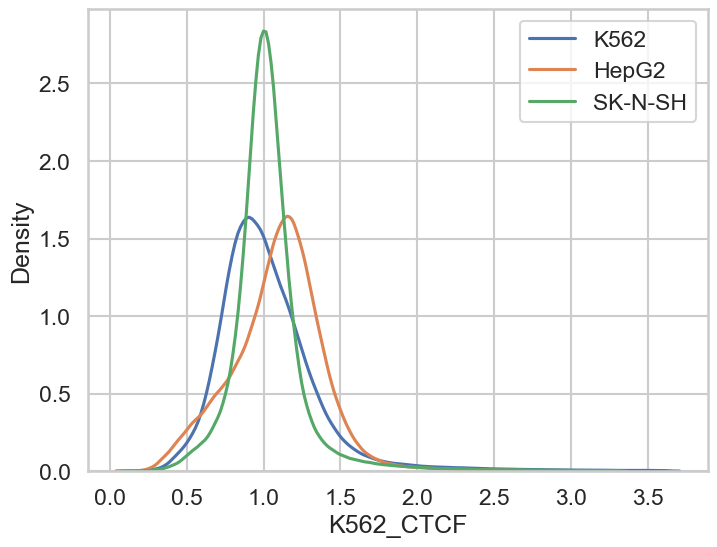

In [43]:
for assay in assays:
    plt.figure()
    for cell_type in cell_types:
        x = MPRA_df[f'{cell_type}_{assay}']
        x = x[x < np.percentile(x, 99)]
        sns.kdeplot(x, label=cell_type)
    plt.legend()

0.2524456792900099


<Axes: xlabel='None', ylabel='None'>

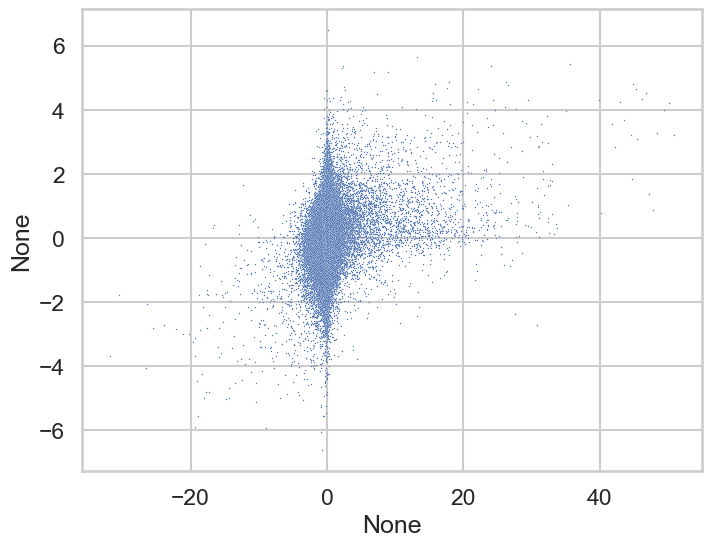

In [10]:
x = MPRA_df[f'K562_DNase'] - MPRA_df[f'HepG2_DNase']
y = MPRA_df[f'K562'] - MPRA_df[f'HepG2']
r = pearson(x, y)[0]
print(r)
sns.scatterplot(x=x, y=y, s=1)

0.4582019721356565


<Axes: xlabel='None', ylabel='None'>

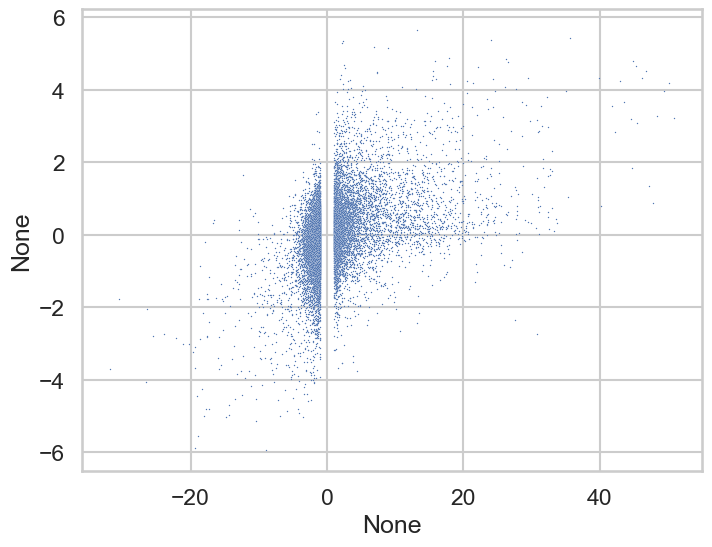

In [12]:
x = MPRA_df[f'K562_DNase'] - MPRA_df[f'HepG2_DNase']
y = MPRA_df[f'K562'] - MPRA_df[f'HepG2']
cond = x.abs() > 1
x = x[cond]
y = y[cond]
r = pearson(x, y)[0]
print(r)
sns.scatterplot(x=x, y=y, s=1)

In [15]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_feature_0528.csv')
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF,mean
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.709,0.030,0.017,0.005,0.004,0.012,0.001,0.103,0.005,0.014,0.008,0.001,0.031,0.002,0.001,0.028,0.005,0.017,0.008,0.001,0.046,NaN,0.000,NaN,0.003,0.020,0.014,0.005,0.031,0.005,0.001,0.006,0.005,0.060,0.021,0.003,0.026,0.002,0.000,0.002,0.017,-0.009
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.266,0.031,0.018,0.005,0.004,0.012,0.001,0.107,0.004,0.014,0.009,0.002,0.031,0.002,0.001,0.028,0.005,0.019,0.009,0.001,0.046,NaN,0.000,NaN,0.003,0.020,0.015,0.005,0.033,0.006,0.001,0.006,0.005,0.060,0.023,0.003,0.027,0.002,0.000,0.002,0.016,-0.255
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.619,0.005,0.001,0.001,0.001,0.001,0.001,0.002,0.000,0.013,0.005,0.002,0.002,0.003,0.000,0.015,0.001,0.002,0.002,0.003,0.002,NaN,0.000,NaN,0.001,0.034,0.002,0.002,0.003,0.011,0.000,0.002,0.001,0.112,0.004,0.001,0.010,0.002,0.000,0.000,0.001,-0.184
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.668,0.006,0.001,0.001,0.001,0.002,0.001,0.002,0.000,0.014,0.007,0.003,0.002,0.004,0.000,0.013,0.001,0.002,0.003,0.005,0.002,NaN,0.000,NaN,0.001,0.033,0.003,0.002,0.004,0.013,0.000,0.002,0.001,0.115,0.006,0.001,0.012,0.002,0.000,0.000,0.001,0.082
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.168,0.000,0.000,0.000,0.001,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.001,NaN,0.000,NaN,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.003,0.000,0.002,0.000,0.000,0.005,0.000,0.000,0.000,0.000,-0.347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.708,1.294,1.077,NaN,NaN,0.154,0.044,0.004,0.006,0.025,0.001,0.203,0.006,0.087,0.036,0.002,0.029,0.002,0.001,0.021,0.006,0.428,0.106,0.007,0.074,NaN,0.000,NaN,0.026,0.192,0.096,0.012,0.034,0.023,0.001,0.006,0.005,0.328,0.116,0.022,0.030,0.006,0.000,0.002,0.020,1.026
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.547,-0.429,NaN,NaN,0.001,0.000,0.000,0.001,0.000,0.000,0.001,0.000,0.001,0.000,0.000,0.001,0.000,0.000,0.021,0.000,0.004,0.000,0.000,0.001,NaN,0.000,NaN,0.000,0.001,0.000,0.000,0.002,0.000,0.000,0.005,0.000,0.005,0.000,0.000,0.004,0.000,0.000,0.000,0.000,-0.561
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.146,-0.200,-0.310,NaN,NaN,0.003,0.000,0.001,0.001,0.001,0.001,0.002,0.000,0.004,0.001,0.001,0.002,0.002,0.000,0.022,0.000,0.006,0.000,0.001,0.002,NaN,0.000,NaN,0.000,0.020,0.001,0.002,0.004,0.008,0.000,0.004,0.001,0.064,0.003,0.002,0.007,0.004,0.000,0.001,0.001,-0.219
760677,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,-0.11

In [26]:
MPRA_df['allele'].notna().value_counts()

allele
True     746301
False     14378
Name: count, dtype: int64

In [17]:
data_split_dict = {}
data_split_dict['total'] = np.ones(len(MPRA_df), dtype=bool)

data_split_dict['chrom'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(1, 23)) + ['X', 'Y'])])
data_split_dict['designed'] = ~data_split_dict['chrom']

data_split_dict['train'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(3, 23)) + ['X', 'Y'])])
data_split_dict['valid'] = MPRA_df['chr'].isin(['chr1'])
data_split_dict['test'] = MPRA_df['chr'].isin(['chr2'])

data_split_dict['ref'] = (MPRA_df['allele'] == 'ref') | (MPRA_df['allele'].isna())
data_split_dict['alt'] = MPRA_df['allele'] == 'alt'

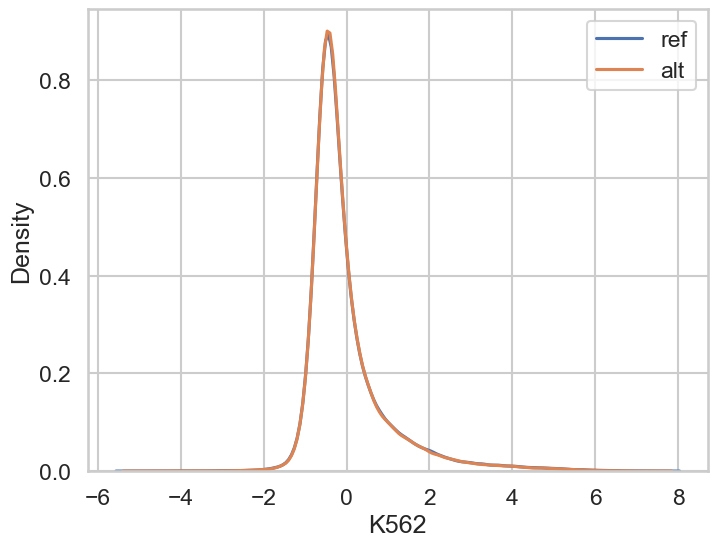

In [21]:
cond = data_split_dict['ref']
group1 = MPRA_df.loc[cond, 'K562']
group2 = MPRA_df.loc[~cond, 'K562']

sns.kdeplot(group1, label='ref')
sns.kdeplot(group2, label='alt')
plt.legend()

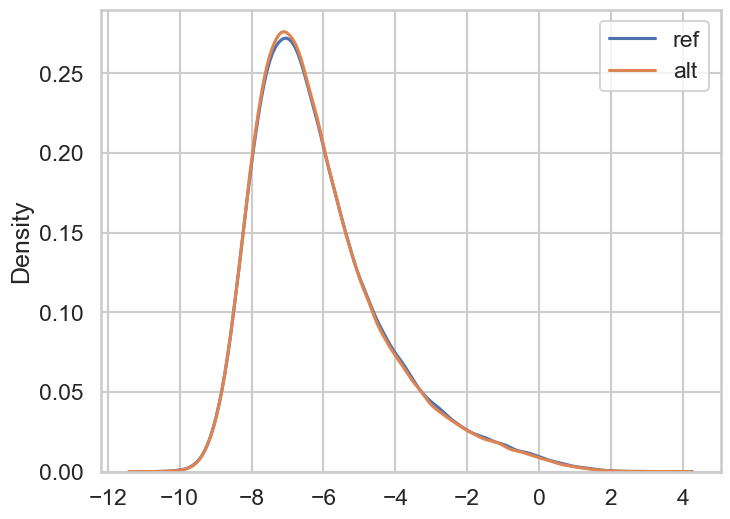

In [24]:
cond = data_split_dict['ref']
group1 = logit(MPRA_df.loc[cond, 'K562_DNase'])
group2 = logit(MPRA_df.loc[~cond, 'K562_DNase'])

sns.kdeplot(group1, label='ref')
sns.kdeplot(group2, label='alt')
plt.legend()

In [ ]:
cond = MPRA_df['K562_DNase'] > MPRA_df['HepG2_DNase']

# ② 计算差值并打标签
MPRA_df['diff'] = MPRA_df['K562'] - MPRA_df['HepG2']
MPRA_df['Group'] = np.where(
    cond,
    'K562_DNase > HepG2_DNase',
    'K562_DNase ≤ HepG2_DNase'
)

group1 = MPRA_df.loc[cond, 'diff']
group2 = MPRA_df.loc[~cond, 'diff']


In [3]:
data_split_dict = {}
data_split_dict['total'] = np.ones(len(MPRA_df), dtype=bool)

data_split_dict['chrom'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(1, 23)) + ['X', 'Y'])])
data_split_dict['designed'] = ~data_split_dict['chrom']

data_split_dict['train'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(3, 23)) + ['X', 'Y'])])
data_split_dict['valid'] = MPRA_df['chr'].isin(['chr1'])
data_split_dict['test'] = MPRA_df['chr'].isin(['chr2'])

data_split_dict['ref'] = (MPRA_df['allele'] == 'ref') | (MPRA_df['allele'].isna())
data_split_dict['alt'] = MPRA_df['allele'] == 'alt'

data_split_dict['high'] = MPRA_df[cell_types].mean(axis=1) > 1


MPRA_df['std'] = MPRA_df[cell_types].std(axis=1, skipna=True)
threshold = np.percentile(MPRA_df['std'].dropna(), 95)
data_split_dict['diff'] = (MPRA_df['std'] > threshold)
data_split_dict['const'] = ~data_split_dict['diff']


for cell_type in cell_types:
    data_split_dict[f'{cell_type}_specific'] = (MPRA_df[cell_type] - MPRA_df[cell_types].mean(axis=1)).abs() > 1

for cell_type in cell_types:
    data_split_dict[f'{cell_type}_high'] = (MPRA_df[cell_type]) > 1

# MPRA_df['diff'] = (MPRA_df[cell_types].max(axis=1) - MPRA_df[cell_types].min(axis=1)) > 1
# data_split_dict['const'] = ~MPRA_df['diff']
# data_split_dict['diff']  = MPRA_df['diff']

for key in data_split_dict:
    print(key, data_split_dict[key].sum())

keys = list(data_split_dict.keys())
for k1 in keys:
    for k2 in keys:
        data_split_dict[f'{k1}_{k2}'] = data_split_dict[k1] & data_split_dict[k2]

total 760679
chrom 760679
designed 0
train 631073
valid 70952
test 58654
ref 389266
alt 371413
high 79000
diff 38034
const 722645
K562_specific 25773
HepG2_specific 14562
SK-N-SH_specific 18305
HCT116_specific 6139
A549_specific 10857
K562_high 87728
HepG2_high 92456
SK-N-SH_high 81561
HCT116_high 52903
A549_high 29155


In [6]:
cell_types = ['K562', 'HepG2', 'SK-N-SH']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

for cell_type in cell_types:
    MPRA_df[f'{cell_type}_deviation'] = MPRA_df[f'{cell_type}'] - MPRA_df[cell_types].mean(1)

for cell_type in cell_types:
    for assay in assays:
        cols = [f'{cell_type}_{assay}' for assay in assays]
        MPRA_df[f'{cell_type}_{assay}_deviation'] = MPRA_df[f'{cell_type}_{assay}'] - MPRA_df[cols].mean(1)

MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF,mean,std,K562_deviation,HepG2_deviation,SK-N-SH_deviation,K562_DNase_deviation,K562_H3K4me3_deviation,K562_H3K27ac_deviation,K562_CTCF_deviation,HepG2_DNase_deviation,HepG2_H3K4me3_deviation,HepG2_H3K27ac_deviation,HepG2_CTCF_deviation,SK-N-SH_DNase_deviation,SK-N-SH_H3K4me3_deviation,SK-N-SH_H3K27ac_deviation,SK-N-SH_CTCF_deviation
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.709,0.030,0.017,0.005,0.004,0.012,0.001,0.103,0.005,0.014,0.008,0.001,0.031,0.002,0.001,0.028,0.005,0.017,0.008,0.001,0.046,NaN,0.000,NaN,0.003,0.020,0.014,0.005,0.031,0.005,0.001,0.006,0.005,0.060,0.021,0.003,0.026,0.002,0.000,0.002,0.017,-0.009,0.351,0.023,-0.045,0.021,0.016,0.003,-0.009,-0.009,0.007,0.001,-0.006,-0.002,0.010,0.001,-0.006,-0.004
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.266,0.031,0.018,0.005,0.004,0.012,0.001,0.107,0.004,0.014,0.009,0.002,0.031,0.002,0.001,0.028,0.005,0.019,0.009,0.001,0.046,NaN,0.000,NaN,0.003,0.020,0.015,0.005,0.033,0.006,0.001,0.006,0.005,0.060,0.023,0.003,0.027,0.002,0.000,0.002,0.016,-0.255,0.558,-0.787,0.438,0.349,0.016,0.003,-0.010,-0.010,0.007,0.001,-0.006,-0.003,0.011,0.001,-0.007,-0.005
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.619,0.005,0.001,0.001,0.001,0.001,0.001,0.002,0.000,0.013,0.005,0.002,0.002,0.003,0.000,0.015,0.001,0.002,0.002,0.003,0.002,NaN,0.000,NaN,0.001,0.034,0.002,0.002,0.003,0.011,0.000,0.002,0.001,0.112,0.004,0.001,0.010,0.002,0.000,0.000,0.001,-0.184,0.782,-0.820,0.824,-0.004,0.003,-0.001,-0.001,-0.001,0.008,-0.001,-0.003,-0.004,-0.000,0.000,0.001,-0.001
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.668,0.006,0.001,0.001,0.001,0.002,0.001,0.002,0.000,0.014,0.007,0.003,0.002,0.004,0.000,0.013,0.001,0.002,0.003,0.005,0.002,NaN,0.000,NaN,0.001,0.033,0.003,0.002,0.004,0.013,0.000,0.002,0.001,0.115,0.006,0.001,0.012,0.002,0.000,0.000,0.001,0.082,0.703,-0.861,0.669,0.192,0.004,-0.001,-0.001,-0.002,0.008,0.001,-0.003,-0.005,-0.000,0.000,0.002,-0.002
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.168,0.000,0.000,0.000,0.001,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.001,NaN,0.000,NaN,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.003,0.000,0.002,0.000,0.000,0.005,0.000,0.000,0.000,0.000,-0.347,0.311,-0.110,-0.298,0.408,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.708,1.294,1.077,NaN,NaN,0.154,0.044,0.004,0.006,0.025,0.001,0.203,0.006,0.087,0.036,0.002,0.029,0.002,0.001,0.021,0.006,0.428,0.106,0.007,0.074,NaN,0.000,NaN,0.026,0.192,0.096,0.012,0.034,0.023,0.001,0.006,0.005,0.328,0.116,0.022,

0.709952865465359


<Axes: xlabel='K562_DNase', ylabel='HepG2_DNase'>

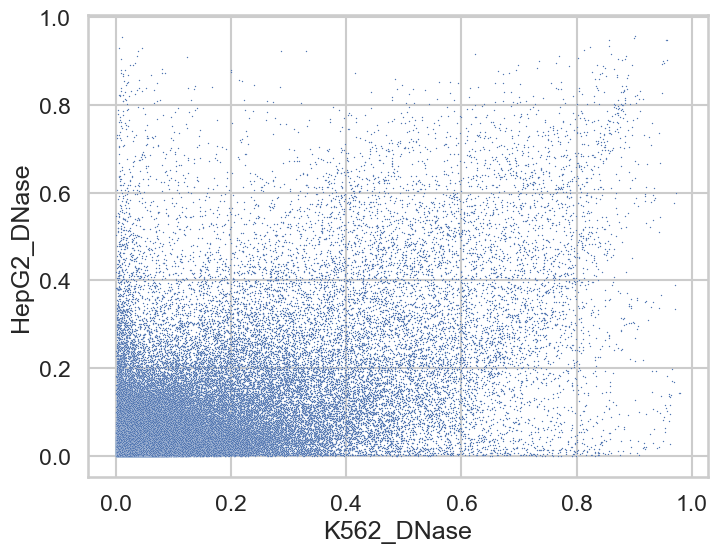

In [11]:
x = MPRA_df[f'K562_DNase']
y = MPRA_df[f'HepG2_DNase']
r = pearson(x, y)[0]
print(r)
sns.scatterplot(x=x, y=y, s=1)

0.21477538231747195


0.5050244881320751


<Axes: xlabel='None', ylabel='None'>

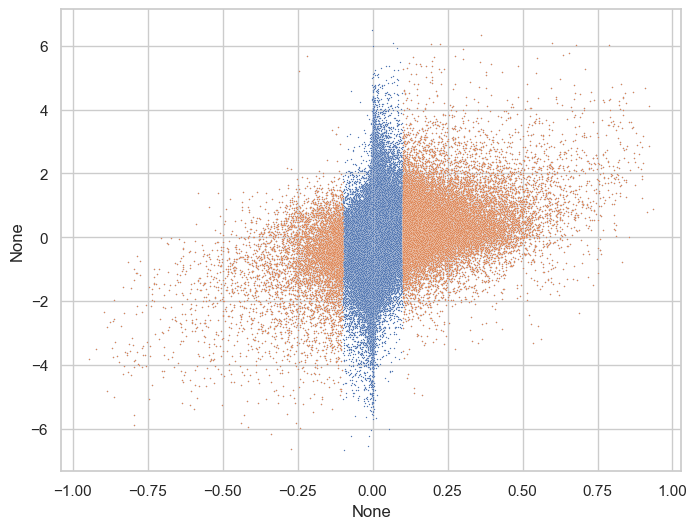

In [23]:
x = MPRA_df[f'K562_DNase'] - MPRA_df[f'HepG2_DNase']
y = MPRA_df[f'K562'] - MPRA_df[f'HepG2']
r = pearson(x, y)[0]
print(r)
sns.scatterplot(x=x, y=y, s=1)



x = MPRA_df[f'K562_DNase'] - MPRA_df[f'HepG2_DNase']
y = MPRA_df[f'K562'] - MPRA_df[f'HepG2']
cond = x.abs() > 0.1
x = x[cond]
y = y[cond]
r = pearson(x, y)[0]
print(r)
sns.scatterplot(x=x, y=y, s=1)

0.08914105304846935
0.30774433263153983


<Axes: xlabel='None', ylabel='None'>

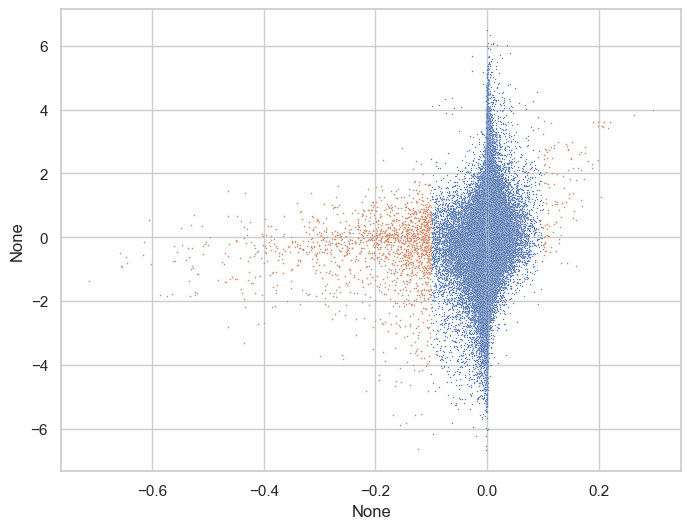

In [24]:
x = MPRA_df[f'K562_H3K4me3'] - MPRA_df[f'HepG2_H3K4me3']
y = MPRA_df[f'K562'] - MPRA_df[f'HepG2']
r = pearson(x, y)[0]
print(r)
sns.scatterplot(x=x, y=y, s=1)



x = MPRA_df[f'K562_H3K4me3'] - MPRA_df[f'HepG2_H3K4me3']
y = MPRA_df[f'K562'] - MPRA_df[f'HepG2']
cond = x.abs() > 0.1
x = x[cond]
y = y[cond]
r = pearson(x, y)[0]
print(r)
sns.scatterplot(x=x, y=y, s=1)

In [27]:
x = MPRA_df[f'K562_H3K4me3'] - MPRA_df[f'HepG2_H3K4me3']
sns.histplot(x, bins=100)

KeyboardInterrupt: 

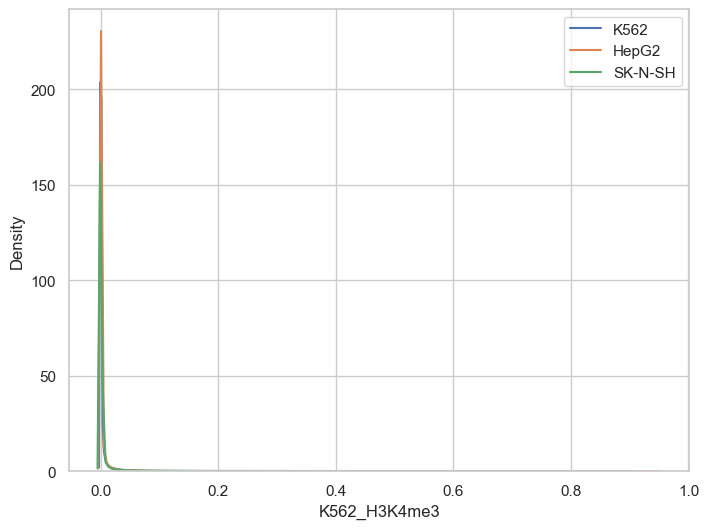

In [26]:
for cell_type in cell_types:
    x = MPRA_df[f'{cell_type}_H3K4me3']
    sns.kdeplot(x, label=cell_type)
plt.legend()

Welch t‑test: t = 155.737, p = 0.0


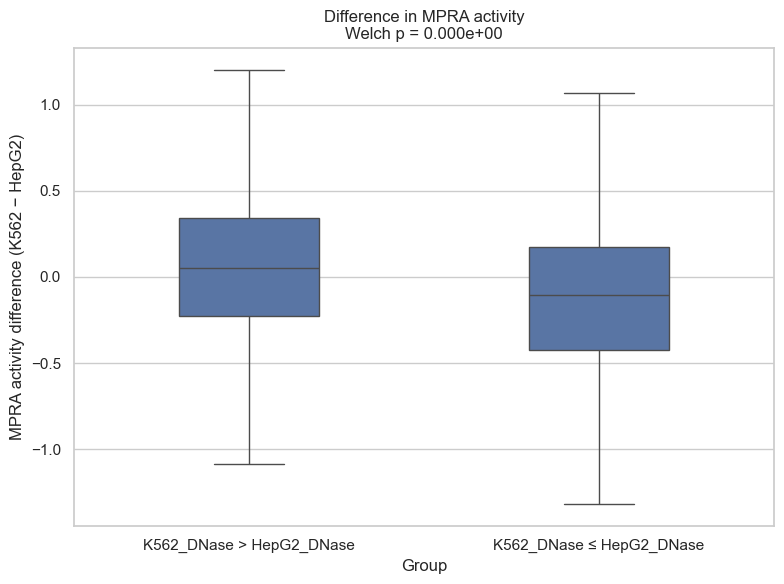

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu

# ① 拆分数据
cond = MPRA_df['K562_DNase'] > MPRA_df['HepG2_DNase']

# ② 计算差值并打标签
MPRA_df['diff'] = MPRA_df['K562'] - MPRA_df['HepG2']
MPRA_df['Group'] = np.where(
    cond,
    'K562_DNase > HepG2_DNase',
    'K562_DNase ≤ HepG2_DNase'
)

group1 = MPRA_df.loc[cond, 'diff']
group2 = MPRA_df.loc[~cond, 'diff']

# ③ 统计检验
t_stat, t_p = ttest_ind(group1, group2, equal_var=False)

print(f"Welch t‑test: t = {t_stat:.3f}, p = {t_p}")

# ④ seaborn 画图（不显示离群点）
plt.figure(figsize=(8, 6))

ax = sns.boxplot(
    x='Group',
    y='diff',
    data=MPRA_df,
    showfliers=False,     # 关键参数：隐藏离群点
    width=0.4
)

ax.set_ylabel('MPRA activity difference (K562 − HepG2)')
ax.set_title(f'Difference in MPRA activity\nWelch p = {t_p:.3e}')
plt.tight_layout()
plt.show()

K562 0.11094593178933432


HepG2 0.1187434278818893
SK-N-SH 0.033564682707032265


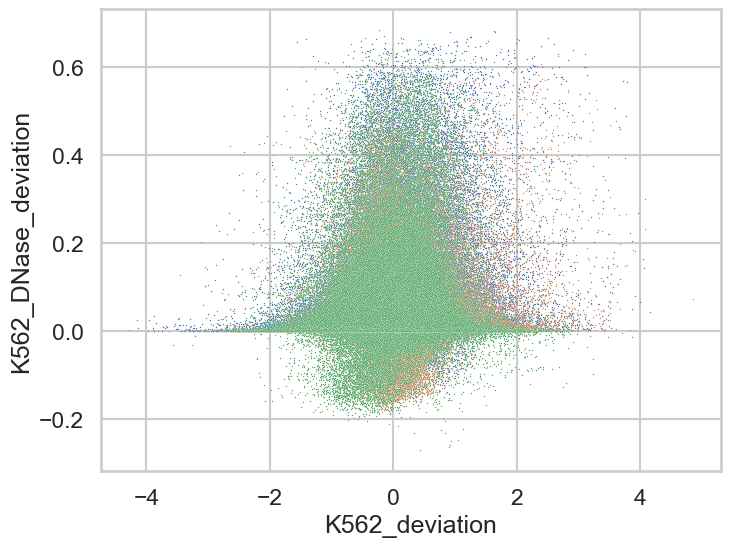

In [9]:
for cell_type in cell_types:
    x = MPRA_df[f'{cell_type}_deviation']
    y = MPRA_df[f'{cell_type}_DNase_deviation']
    r = pearson(x, y)[0]
    print(cell_type, r)
    sns.scatterplot(x=x, y=y, s=1)

In [20]:
# seq feature
# train 3 cell types

y_pred = np.load(f'../saved/0507_GosaiMPRA_MyResTransformer3/0507_044041/Gosai_pred.npy')
cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred

In [21]:
# 预测值和真实值的相关性

for data_split in ['train', 'test', 'const', 'diff', 'specific', 'high']:
    corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types_pred)
    for cell_type in cell_types:
        for cell_type_pred in cell_types_pred:
            if data_split == 'specific' or data_split == 'high':
                condition = data_split_dict[f'{cell_type}_{data_split}']
            else:
                condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_pred}']
            r, p = pearson(x, y)
            corr_matrix.loc[cell_type, cell_type_pred] = r
    print(data_split)
    print(corr_matrix)

train
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.898      0.865        0.869       0.872     0.870
HepG2       0.933      0.953        0.934       0.936     0.941
SK-N-SH     0.891      0.894        0.916       0.892     0.892
HCT116      0.889      0.891        0.893       0.895     0.888
A549        0.796      0.802        0.808       0.811     0.812
test
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.817      0.781        0.787       0.793     0.789
HepG2       0.834      0.851        0.832       0.836     0.842
SK-N-SH     0.800      0.796        0.821       0.797     0.795
HCT116      0.817      0.817        0.815       0.824     0.815
A549        0.710      0.710        0.717       0.727     0.729
const
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.902      0.887        0.887       0.890     0.889
HepG2       0.935      0.942        0.933       0.932     0.934
SK-N-SH     0.900      

In [22]:
# def quantile_normalize(df: pd.DataFrame) -> pd.DataFrame:
#     # 排序
#     sorted_df = pd.DataFrame(
#         np.sort(df.values, axis=0),
#         index=df.index,
#         columns=df.columns
#     )
    
#     # 计算每一行的平均（也就是所有列排序后对应rank位置的平均）
#     mean_ranks = sorted_df.mean(axis=1)
    
#     # 得到每列的排序索引
#     ranks = df.rank(method="min", axis=0).astype(int) - 1  # 0-based index
    
#     # 构建归一化后的结果矩阵
#     normed = df.copy()
#     for col in df.columns:
#         normed[col] = ranks[col].apply(lambda r: mean_ranks.iloc[r])
    
#     return normed

# cell_types = ['K562', 'HepG2', 'SK-N-SH']
# df[cell_types] = quantile_normalize(df[cell_types])

test
         K562_pred  HepG2_pred  SK-N-SH_pred  HCT116_pred  A549_pred
K562         0.482      -0.193        -0.258        0.005     -0.053
HepG2       -0.200       0.425        -0.192        0.053      0.204
SK-N-SH     -0.309      -0.180         0.428       -0.052     -0.126
HCT116      -0.099       0.065         0.032        0.192      0.058
A549        -0.112       0.020         0.081        0.093      0.105


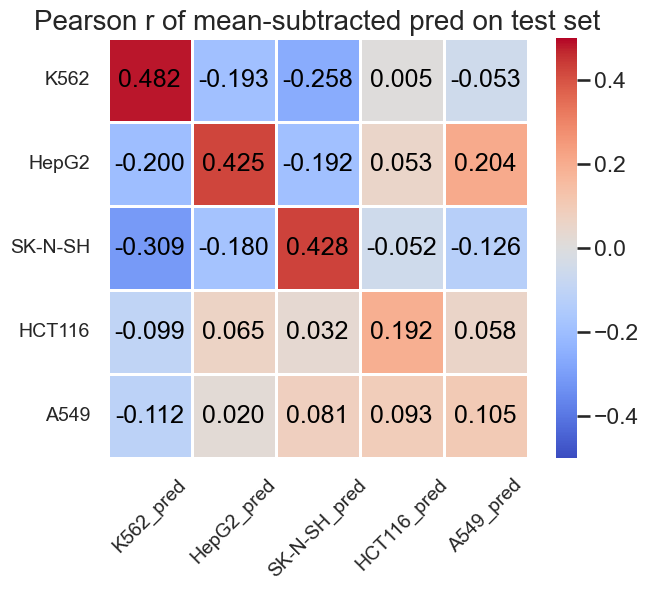

In [29]:
for data_split in ['test']:
    pearson_df = pd.DataFrame(dtype=float)
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            df = MPRA_df[condition]
            mean = df[['K562', 'HepG2', 'SK-N-SH']].mean(axis=1)
            x = df[f'{cell_type}'] - df[['K562', 'HepG2', 'SK-N-SH']].mean(axis=1)
            y = df[f'{cell_type_2}_pred'] - df[['K562_pred', 'HepG2_pred', 'SK-N-SH_pred']].mean(axis=1)
            r, p = pearson(x, y)
            pearson_df.loc[cell_type, f'{cell_type_2}_pred'] = r
    print(data_split)
    print(pearson_df)




plt.figure(figsize=(8, 6), dpi=100)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
sns.heatmap(pearson_df, square=True, linewidths=1, cmap='coolwarm', vmin=-0.5, vmax=0.5, 
            annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.columns, 
        rotation=45, fontsize=14)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.index, 
        rotation=0, fontsize=14)
plt.title(f'Pearson r of mean-subtracted pred on test set', fontsize=20)
plt.grid(False)
plt.savefig(f'figures/Gosai_heatmap_pred-mean_{data_split}.png', dpi=400)
plt.show()

specific
         K562  HepG2  SK-N-SH  HCT116  A549
K562    1.000  0.268    0.188   0.331 0.212
HepG2   0.304  1.000    0.371   0.486 0.390
SK-N-SH 0.425  0.603    1.000   0.620 0.614
HCT116  0.388  0.547    0.425   1.000 0.723
A549    0.685  0.677    0.789   0.836 1.000


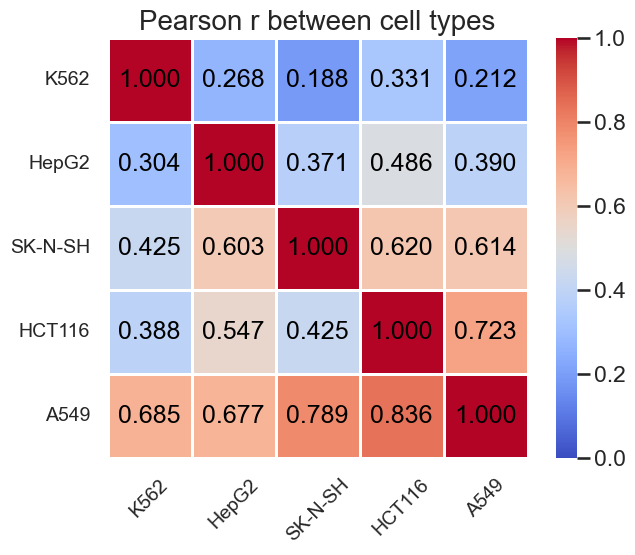

In [6]:

pearson_df = pd.DataFrame(dtype=float)
for cell_type in cell_types:
    for cell_type_2 in cell_types:
        condition_1 = data_split_dict['total']
        condition_2 = data_split_dict[f'{cell_type}_specific']
        df = MPRA_df[condition_1 & condition_2]
        x = df[f'{cell_type}']
        y = df[f'{cell_type_2}']
        r = pearson(x, y)[0]
        pearson_df.loc[cell_type, cell_type_2] = r
print('specific')
print(pearson_df)


# pearson_df = pd.DataFrame(dtype=float)
# for cell_type in cell_types:
#     for cell_type_2 in cell_types:
#         condition_1 = data_split_dict['test']
#         condition_2 = data_split_dict[f'{cell_type}_specific']
#         df = MPRA_df[condition_1 & condition_2]
#         x = df[f'{cell_type}']
#         y = df[f'{cell_type_2}']
#         r = pearson(x, y)[0]
#         pearson_df.loc[cell_type, cell_type_2] = r
# print('test+specific')
# print(pearson_df)



plt.figure(figsize=(8, 6), dpi=100)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
sns.heatmap(pearson_df, square=True, linewidths=1, cmap='coolwarm', vmin=0, vmax=1, 
            annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.columns, 
        rotation=45, fontsize=14)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.index, 
        rotation=0, fontsize=14)
plt.title(f'Pearson r between cell types', fontsize=20)
plt.grid(False)
plt.savefig(f'figures/Gosai_heatmap_activity_pearson_{data_split}.png', dpi=400)
plt.show()

test+specific
         K562_pred  HepG2_pred  SK-N-SH_pred  HCT116_pred  A549_pred
K562         0.577       0.384         0.411        0.424      0.411
HepG2        0.542       0.669         0.541        0.590      0.646
SK-N-SH      0.612       0.588         0.707        0.614      0.609
HCT116       0.491       0.512         0.478        0.601      0.547
A549         0.714       0.735         0.739        0.754      0.746


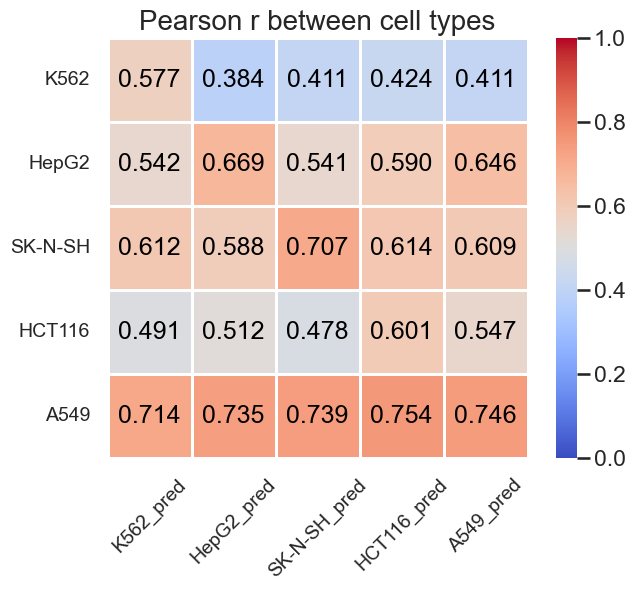

In [49]:

# pearson_df = pd.DataFrame(dtype=float)
# for cell_type in cell_types:
#     for cell_type_2 in cell_types:
#         condition_1 = data_split_dict['total']
#         condition_2 = data_split_dict[f'{cell_type}_specific']
#         df = MPRA_df[condition_1 & condition_2]
#         x = df[f'{cell_type}']
#         y = df[f'{cell_type_2}_pred']
#         r = pearson(x, y)[0]
#         pearson_df.loc[cell_type, cell_type_2] = r
# print('specific')
# print(pearson_df)


pearson_df = pd.DataFrame(dtype=float)
for cell_type in cell_types:
    for cell_type_2 in cell_types:
        condition_1 = data_split_dict['test']
        condition_2 = data_split_dict[f'{cell_type}_specific']
        df = MPRA_df[condition_1 & condition_2]
        x = df[f'{cell_type}']
        y = df[f'{cell_type_2}_pred']
        r = pearson(x, y)[0]
        pearson_df.loc[cell_type, f'{cell_type_2}_pred'] = r
print('test+specific')
print(pearson_df)



plt.figure(figsize=(8, 6), dpi=100)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
sns.heatmap(pearson_df, square=True, linewidths=1, cmap='coolwarm', vmin=0, vmax=1, 
            annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.columns, 
        rotation=45, fontsize=14)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.index, 
        rotation=0, fontsize=14)
plt.title(f'Pearson r between cell types', fontsize=20)
plt.grid(False)
plt.savefig(f'figures/Gosai_heatmap_pred_activity_pearson_test_specific.png', dpi=400)
plt.show()

total
         K562  HepG2  SK-N-SH  HCT116  A549
K562    1.000  0.801    0.759   0.825 0.724
HepG2   0.801  1.000    0.836   0.879 0.730
SK-N-SH 0.759  0.836    1.000   0.833 0.777
HCT116  0.825  0.879    0.833   1.000 0.825
A549    0.724  0.730    0.777   0.825 1.000


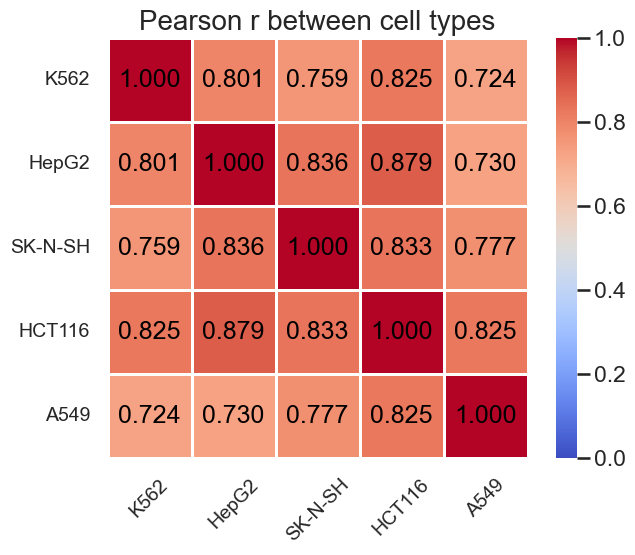

diff
         K562  HepG2  SK-N-SH  HCT116  A549
K562    1.000  0.471    0.453   0.516 0.561
HepG2   0.471  1.000    0.622   0.675 0.617
SK-N-SH 0.453  0.622    1.000   0.649 0.771
HCT116  0.516  0.675    0.649   1.000 0.821
A549    0.561  0.617    0.771   0.821 1.000


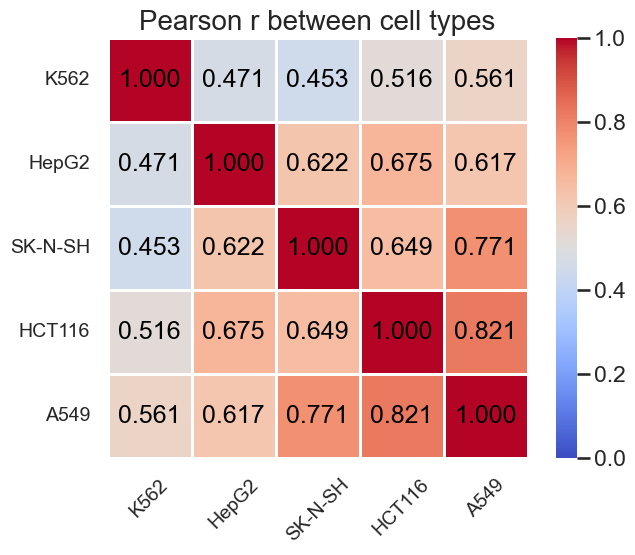

In [37]:
for data_split in ['total', 'diff']:
    pearson_df = pd.DataFrame(dtype=float)
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            if data_split == 'specific' or data_split == 'high':
                condition = data_split_dict[f'{cell_type}_{data_split}']
            else:
                condition = data_split_dict[data_split]

            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_2}']
            r = pearson(x, y)[0]
            pearson_df.loc[cell_type, cell_type_2] = r
    print(data_split)
    print(pearson_df)

    # pearson_df.loc['HCT116', 'A549'] = np.nan
    # pearson_df.loc['A549', 'HCT116'] = np.nan


    plt.figure(figsize=(8, 6), dpi=100)
    # plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
    sns.heatmap(pearson_df, square=True, linewidths=1, cmap='coolwarm', vmin=0, vmax=1, 
                annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.columns, 
            rotation=45, fontsize=14)
    plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.index, 
            rotation=0, fontsize=14)
    plt.title(f'Pearson r between cell types', fontsize=20)
    plt.grid(False)
    plt.savefig(f'figures/Gosai_heatmap_activity_pearson_{data_split}.png', dpi=400)
    plt.show()

test
         K562_pred  HepG2_pred  SK-N-SH_pred  HCT116_pred  A549_pred
K562         0.817       0.781         0.787        0.793      0.789
HepG2        0.834       0.851         0.832        0.836      0.842
SK-N-SH      0.800       0.796         0.821        0.797      0.795
HCT116       0.817       0.817         0.815        0.824      0.815
A549         0.710       0.710         0.717        0.727      0.729


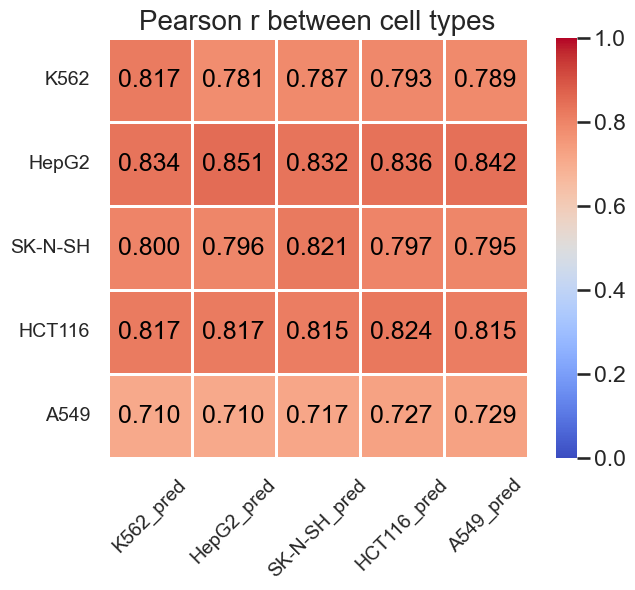

test_diff
         K562_pred  HepG2_pred  SK-N-SH_pred  HCT116_pred  A549_pred
K562         0.708       0.570         0.611        0.608      0.592
HepG2        0.661       0.748         0.677        0.695      0.726
SK-N-SH      0.627       0.608         0.704        0.643      0.628
HCT116       0.696       0.684         0.698        0.742      0.701
A549         0.660       0.695         0.714        0.706      0.705


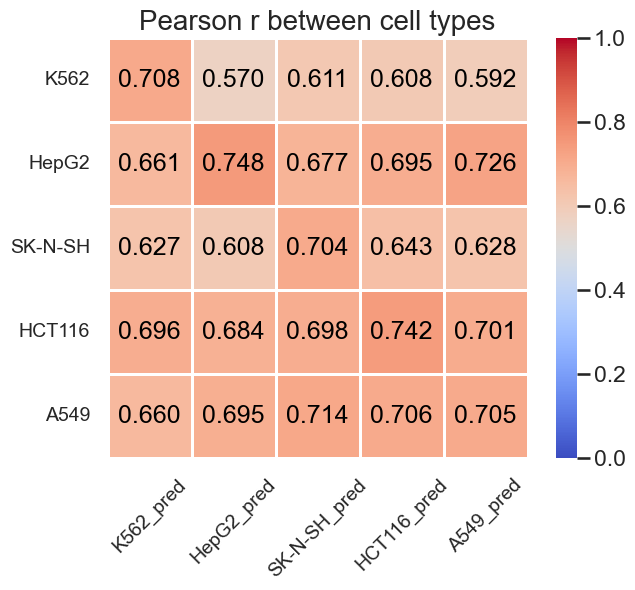

In [38]:
for data_split in ['test', 'test_diff']:
    pearson_df = pd.DataFrame(dtype=float)
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            if data_split == 'specific' or data_split == 'high':
                condition = data_split_dict[f'{cell_type}_{data_split}']
            else:
                condition = data_split_dict[data_split]

            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_2}_pred']
            r = pearson(x, y)[0]
            pearson_df.loc[cell_type, f'{cell_type_2}_pred'] = r
    print(data_split)
    print(pearson_df)

    # pearson_df.loc['HCT116', 'A549'] = np.nan
    # pearson_df.loc['A549', 'HCT116'] = np.nan


    plt.figure(figsize=(8, 6), dpi=100)
    #plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
    sns.heatmap(pearson_df, square=True, linewidths=1, cmap='coolwarm', vmin=0.0, vmax=1, 
                annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.columns, 
            rotation=45, fontsize=14)
    plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.index, 
            rotation=0, fontsize=14)
    plt.title(f'Pearson r between cell types', fontsize=20)
    plt.grid(False)
    plt.savefig(f'figures/Gosai_heatmap_pred_activity_pearson_{data_split}.png', dpi=400)
    plt.show()